In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

**CHATGEMENT DU JEU DE DONNEES**

In [ ]:
my_data=pd.read_csv("/content/Final_Bitcoin_dataset.csv")

**VISUALISATION**

**L'EN TÊTE**

In [ ]:
my_data.head()

,Date,Close,High,Low,Open,Volume,fear_greed
0,2019-03-15,3960.911133,3968.542969,3914.015381,3926.663330,9394210605,55.0
1,2019-03-16,4048.725830,4077.036377,3961.657471,3963.900146,9856166973,54.0
2,2019-03-17,4025.229004,4054.122070,4006.411133,4047.719482,8221625400,58.0
3,2019-03-18,4032.507324,4071.556641,4009.117188,4029.968506,9646954186,56.0
4,2019-03-19,4071.190186,4082.216064,4023.812500,4032.691895,9344919956,56.0


**LE DERNIER LIGNE DU DATA**

In [ ]:
my_data.tail()

,Date,Close,High,Low,Open,Volume,fear_greed
2188,2025-03-11,82862.210938,83577.757812,76624.250000,78523.875000,54702837196,24.0
2189,2025-03-12,83722.359375,84358.578125,80635.250000,82857.375000,40353484454,34.0
2190,2025-03-13,81066.703125,84301.695312,79931.851562,83724.921875,31412940153,45.0
2191,2025-03-14,83969.101562,85263.289062,80797.562500,81066.992188,29588112414,27.0
2192,2025-03-15,84300.000000,84647.273438,83708.976562,83989.804688,13801613312,46.0


In [ ]:
my_data.shape

(2193, 7)

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2193 non-null   object 
 1   Close       2193 non-null   float64
 2   High        2193 non-null   float64
 3   Low         2193 non-null   float64
 4   Open        2193 non-null   float64
 5   Volume      2193 non-null   int64  
 6   fear_greed  2192 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
my_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
fear_greed,1


In [ ]:
my_data.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
fear_greed,1


**RESUMÉ STATISTIQUE**

In [ ]:
my_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2193.0,3.457725e+04,2.434170e+04,3.960911e+03,1.158493e+04,2.917692e+04,4.936885e+04,1.061463e+05
High,2193.0,3.529667e+04,2.484661e+04,3.968543e+03,1.180006e+04,2.949801e+04,5.079716e+04,1.091149e+05
Low,2193.0,3.375022e+04,2.376974e+04,3.914015e+03,1.129699e+04,2.872027e+04,4.792586e+04,1.052917e+05
Open,2193.0,3.454253e+04,2.432902e+04,3.926663e+03,1.154872e+04,2.916907e+04,4.941348e+04,1.061473e+05
Volume,2193.0,3.183552e+10,1.932146e+10,5.331173e+09,1.892708e+10,2.777333e+10,3.900685e+10,3.509679e+11
fear_greed,2192.0,4.985584e+01,2.205195e+01,5.000000e+00,3.000000e+01,5.000000e+01,7.000000e+01,9.500000e+01


**INTERPRETATION**

In [ ]:
colonne_num=my_data.select_dtypes(include=['number']).columns
print(colonne_num)
print(my_data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed'], dtype='object')


**Convertit la colonne 'Date' en format datetime et affiche des courbes temporelles pour les colonnes numériques ('Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed').**

In [ ]:
def process_and_plot_timeseries(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Trier les données par date pour éviter des erreurs d'affichage
    df = df.sort_values(by='Date')
    # Liste des colonnes numériques à visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # Vérification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Création des courbes temporelles
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(2, 4, i)  # 2 lignes, 3 colonnes pour les subplots
        plt.plot(df['Date'], df[col], marker='o', linestyle='-', markersize=3, color='b', alpha=0.7)
        plt.title(f'Évolution de {col} en fonction du temps')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.xticks(rotation=45)  # Rotation des dates pour meilleure lisibilité
    plt.tight_layout()  # Ajuste la disposition des graphes
    plt.show()

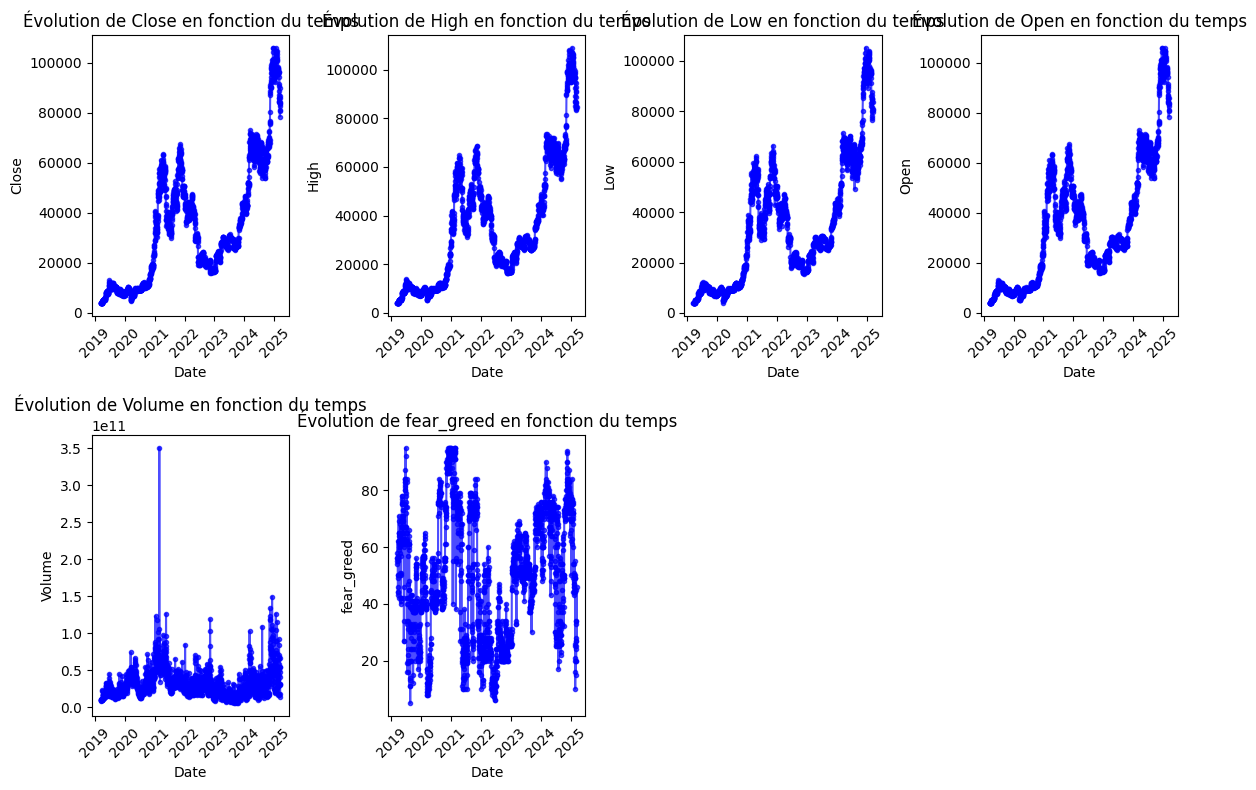

None


In [ ]:
resultat=process_and_plot_timeseries(my_data)
print(resultat)

**INTERPRETATION**

**Analyse univarié**

Convertit la colonne 'Date' en format datetime et affiche des histogrammes pour les colonnes numériques ('Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed')

In [ ]:
def process_and_plot_histograms(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en type datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes numériques à visualiser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # Vérification si toutes les colonnes existent
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Création des histogrammes avec statistiques et polygone de fréquence
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes pour les subplots
        data = df[col].dropna()
        # Histogramme
        counts, bins, _ = plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=False)
        # Polygone de fréquence
        bin_centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(bin_centers, counts, marker='o', linestyle='-', color='red', label='Polygone de fréquence')
        # Calcul des statistiques
        mean_value = np.mean(data)
        std_dev = np.std(data)
        variance = np.var(data)
        median_value = np.median(data)
        min_value = np.min(data)
        max_value = np.max(data)
        # Ajout des statistiques sur le graphe
        stats_text = (f"Moyenne: {mean_value:.2f}\nÉcart-type: {std_dev:.2f}\nVariance: {variance:.2f}\n"
                      f"Médiane: {median_value:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}")
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.legend()
    plt.tight_layout()
    plt.show()

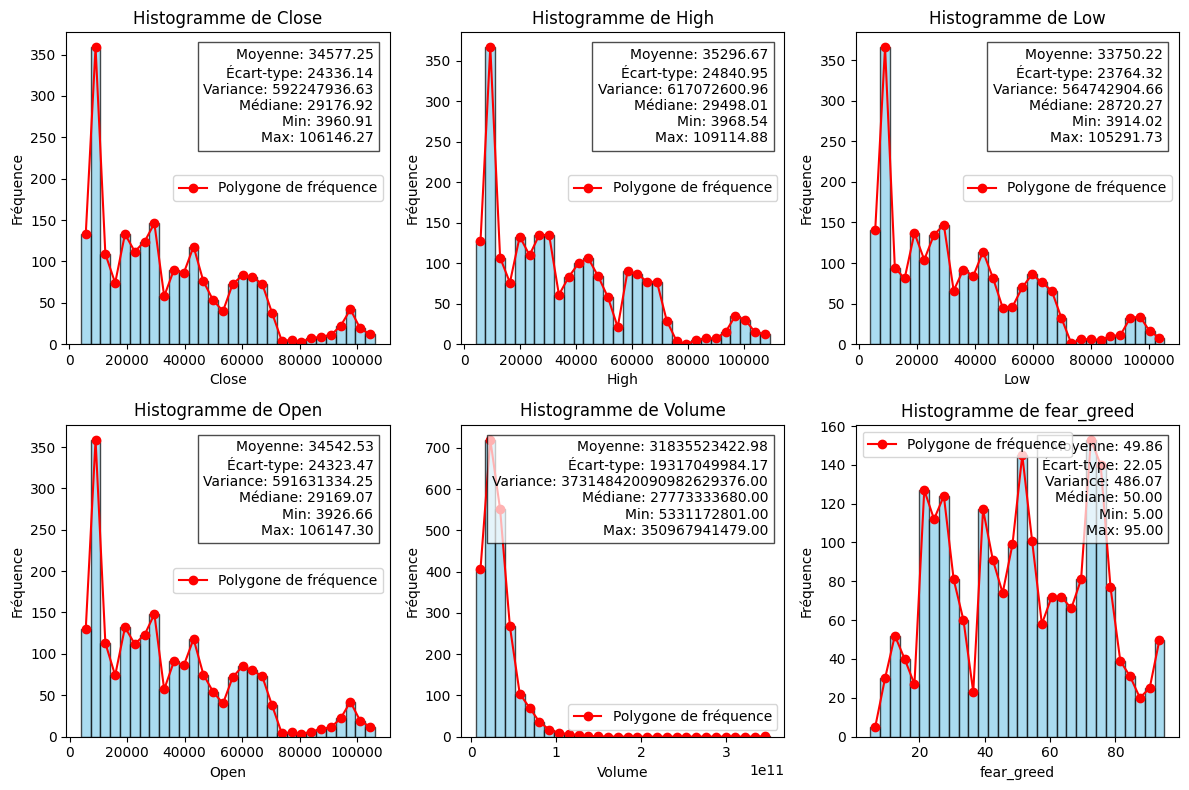

None


In [ ]:
result = process_and_plot_histograms(my_data)
print(result)

**INTERPRETATION**

Les polygones de fréquence des colonnes Close, High, Low, et Open sont pratiquement identiques, ce qui reflète une distribution similaire de ces variables. Ce phénomène se vérifie tant graphiquement qu'à travers les calculs statistiques, car leurs moyennes, écarts-types, valeurs minimales, maximales, médianes, et variances sont presque identiques.

De plus, toutes ces colonnes présentent une distribution asymétrique, à l'exception de la colonne fear_greed. En effet, pour cette dernière, la médiane est égale à 50 et la moyenne (ou espérance) est de 49,86. Bien que le mode ne soit pas calculé ici, on peut en déduire que la distribution de fear_greed est relativement symétrique, puisque la médiane, la moyenne et le mode se trouvent très proches l'un de l'autre.

**l'analyse bivarié**

In [ ]:
def bivariate_analysis(df):
    # Vérification si la colonne 'Date' existe
    if 'Date' not in df.columns:
        raise ValueError("La colonne 'Date' est absente du DataFrame.")
    # Conversion de la colonne 'Date' en format datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Liste des colonnes numériques à analyser
    numeric_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'fear_greed']
    # Vérification de la présence des colonnes
    missing_cols = [col for col in numeric_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Les colonnes suivantes sont absentes du DataFrame : {missing_cols}")
    # Trier les données par date
    df = df.sort_values(by='Date')
    # 🔹 Affichage des scatter plots (relation entre chaque paire de variables)
    sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.7, 's':10})
    plt.suptitle("Analyse Bivariée - Nuages de points", y=1.02)
    plt.show()
    # 🔹 Matrice de corrélation
    plt.figure(figsize=(8, 6))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matrice de Corrélation")
    plt.show()

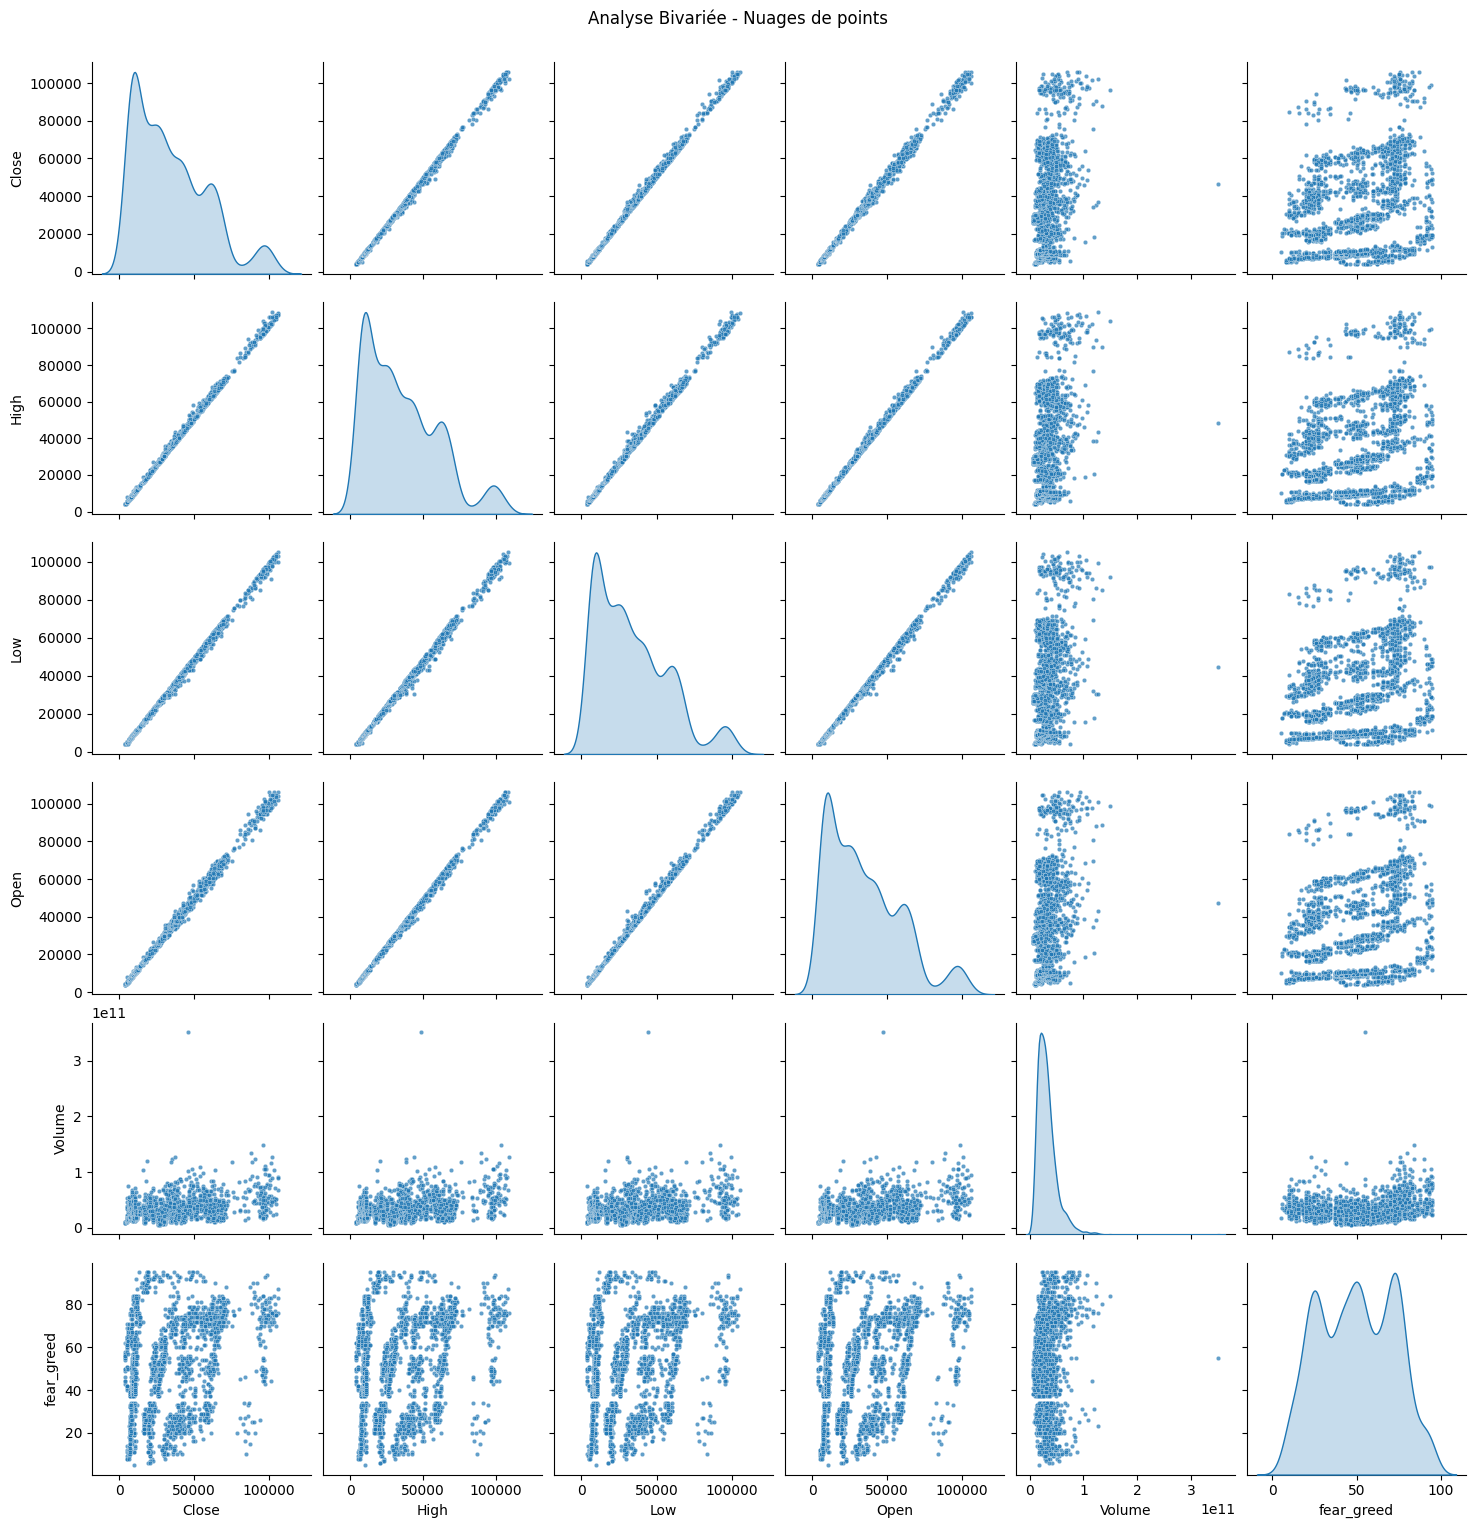

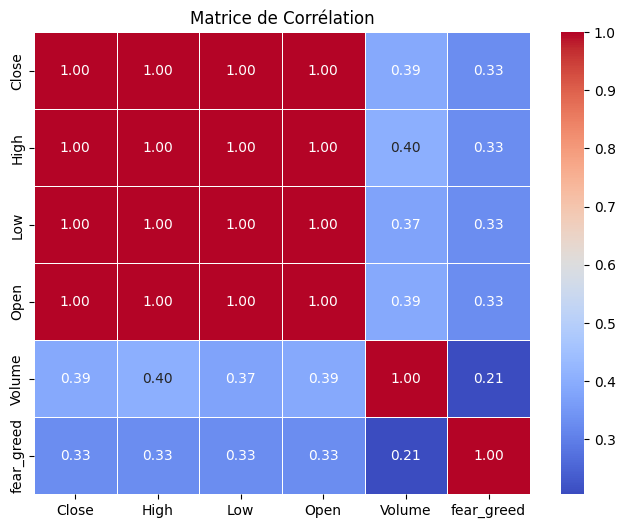

None


In [ ]:
resultat3=bivariate_analysis(my_data)
print(resultat3)

**INTERPRETATION DES GRAPHES ET DE LA MATRICE DE CORRELATION**

**MATRICE DE COLLERATION**

**correlation fort positive**

**Les valeurs des colonnes [Fear_gread, Volume, Open, Low, High, Close], correspondant respectivement aux lignes [Fear_gread, Volume, Open, Low, High, Close] dans la matrice de corrélation, sont toutes égales à 1. Cela indique une forte corrélation entre ces différentes variables.

De plus, les variables [Open, Low, High, Close], prises individuellement (par exemple, Open avec les autres variables Low, High, Close), présentent également une correspondance de 1 dans la matrice de corrélation (sauf pour elles-mêmes). Cela confirme qu'il existe une forte corrélation entre ces variables.**


**INTERPRETATION A LA LUMIERE DE LA VARIABLE CLOSE**

1️⃣ Corrélation forte entre Close et [Open, Low, High]

Puisque la matrice de corrélation montre une valeur de 1 entre Close et ces variables, cela signifie qu'elles évoluent presque de manière identique.

Cela est logique, car dans les marchés financiers, le prix de clôture (Close) est souvent proche des prix d'ouverture (Open), du plus bas (Low) et du plus haut (High) de la journée.

**EN RÉSUMÉ**
Toutes les variables [Fear_gread, Volume, Open, Low, High, Close] ont une corrélation de 1 entre elles, ce qui indique une relation linéaire parfaite.

En particulier, les variables [Open, Low, High, Close] sont fortement corrélées entre elles, ce qui signifie qu'elles évoluent ensemble de manière identique


**correlation positive modérée à valeurs compris entre 0.3 et 0.7**

L'analyse des lignes [Fear_gread, Volume] avec toutes les colonnes [Open, Low, High, Close] montre que leurs valeurs sont comprises entre 0.3 et 0.7.

D'autre part, en analysant individuellement les lignes [Open, Low, High, Close] avec les colonnes [Fear_gread, Volume], on obtient également des valeurs comprises entre 0.3 et 0.7.

Cela signifie que ces différentes variables sont faiblement corrélées, c'est-à-dire qu'il existe une certaine relation linéaire entre elles, mais cette relation n'est pas aussi forte qu'une corrélation élevée.

****INTERPRETATION A LA LUMIERE DE LA VARIABLE CLOSE****

2️⃣ Corrélation modérée entre Close et [Fear_gread, Volume] (0.3 - 0.7)

La variable Close entretient une relation faible à modérée avec Fear_gread et Volume.

Cela signifie que le sentiment de peur/avidité (Fear_gread) et le volume d'échange (Volume) ont une certaine influence sur le prix de clôture, mais cette relation n'est pas forte.

En pratique, cela peut indiquer que d'autres facteurs influencent Close, et que Fear_gread et Volume ne sont pas des prédicteurs suffisants à eux seuls.

**correlation faibles a valeurs compris entre 0 et 0.3**

L'analyse de la variable Fear_gread avec Volume donne une valeur comprise entre 0 et 0.3, ce qui indique une corrélation faible.

Cela signifie qu'il existe une très faible relation linéaire entre ces deux variables, presque négligeable. En d'autres termes, la variation de Fear_gread influence très peu la variation de Volume, et vice versa.

**INTERPRETATION A LA LUMIERE DE LA VRIABLE CLOSE**

3️⃣ Corrélation très faible entre Fear_gread et Volume (0 - 0.3)

Comme leur corrélation est quasi nulle, cela signifie que le sentiment du marché (Fear_gread) et le volume des transactions (Volume) ne varient pas de manière prévisible ensemble.

En d'autres termes, une augmentation du volume d’échange ne reflète pas forcément une peur ou une confiance du marché, et vice versa.

 **Conclusion**
Close est fortement lié à Open, Low, High, ce qui est attendu dans un marché financier.

Close a une influence modérée de Fear_gread et Volume, mais ces variables ne suffisent pas à prédire son évolution.

Fear_gread et Volume sont très faiblement corrélés, donc le sentiment du marché n’explique pas directement l’intensité des échanges.

**INTERPRETATION GRAPHIQUE**

Comme dans le cas de la matrice de confusion, les différents graphiques permettent de visualiser l'évolution des différentes variables les unes par rapport aux autres et par rapport à elles-mêmes.

Ce qui est particulièrement intéressant, c'est que :

Les nuages de points sont presque linéaires pour les variables fortement corrélées, indiquant une relation linéaire évidente entre elles.

Pour les variables faiblement corrélées, les nuages de points ont une structure plus dispersée et particulière, ce qui rend la relation linéaire moins évidente entre ces variables.

Cependant, lorsqu'on analyse chaque variable individuellement, on observe graphiquement une courbe représentant son évolution et sa diminution progressive en fonction du temps ou d'elle-même (sauf pour Fear_gread).

Cas particulier de Fear_gread :

Son graphique présente des pics qui indiquent des valeurs marquées, ainsi que des courbes en forme de V.

La partie basse de ces courbes représente les valeurs minimales.

Cela signifie que les valeurs de la ligne Fear_gread en fonction des prix ont une relation linéaire, mais faible.

****